In [1]:
import feature_extraction
import random
import tensorflow as tf
import os
import pandas as pd
from PIL import Image
import numpy as np


IMG_SIZE = (256, 256)
vectors_from_single_word=100


In [2]:
word_vec_dictionary=feature_extraction.get_wordEmbeddingDictionary()
all_classes= list(word_vec_dictionary.keys())
#seen_keys= random.choices(all_classes,k=20)
#unseen_keys= list(set(all_classes).difference(seen_keys))
seen_keys=feature_extraction.get_entities_in_file_line("trainclasses.txt")
unseen_keys=feature_extraction.get_entities_in_file_line("testclasses.txt")
print(seen_keys)
print(unseen_keys)


['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian', 'horse', 'german+shepherd', 'blue+whale', 'siamese+cat', 'skunk', 'mole', 'tiger', 'moose', 'spider+monkey', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'weasel', 'otter', 'buffalo', 'zebra', 'deer', 'bobcat', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus', 'cow', 'dolphin']
['chimpanzee', 'giant+panda', 'leopard', 'persian+cat', 'pig', 'hippopotamus', 'humpback+whale', 'raccoon', 'rat', 'seal']


In [3]:
min_class= 10000
for key in seen_keys:
    files = os.listdir("JPEGImages\\"+key)
    print(key+":"+str(len(files)))
    if(len(files)<min_class):
        min_class=len(files)
print(min_class)




antelope:1046
grizzly+bear:852
killer+whale:291
beaver:193
dalmatian:549
horse:1645
german+shepherd:1033
blue+whale:174
siamese+cat:500
skunk:188
mole:100
tiger:877
moose:704
spider+monkey:291
elephant:1038
gorilla:872
ox:728
fox:664
sheep:1420
hamster:779
squirrel:1200
rhinoceros:696
rabbit:1088
bat:383
giraffe:1202
wolf:589
chihuahua:567
weasel:272
otter:758
buffalo:895
zebra:1170
deer:1344
bobcat:630
lion:1019
mouse:185
polar+bear:868
collie:1028
walrus:215
cow:1338
dolphin:946
100


In [4]:
feature_extractor_model=feature_extraction.instantiate_model()
IDs=[]
Feature_vectors=[]
feature_extracting_batch_size=16
for key in seen_keys:
    files = os.listdir("JPEGImages\\"+key)
    #input_arr= np.array()
    input_arr=[]
    batch_counter=0
    min_counter=0
    for file in files:
        batch_counter+=1
        min_counter+=1
        id= all_classes.index(key)
        IDs.append(id)
        image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+key+"\\"+file,grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
        input=tf.keras.preprocessing.image.img_to_array(image)
        input_arr.append(input)
        if(batch_counter%feature_extracting_batch_size==0):
            input_model= np.array(input_arr)
            features= feature_extractor_model.predict(input_model)
            for vector in features:
                Feature_vectors.append(vector)

            batch_counter=0
            input_arr=[]
        if(min_counter==min_class):
            break
    if(len(input_arr)>0):
        input_model= np.array(input_arr)
        features= feature_extractor_model.predict(input_model)
        for vector in features:
            Feature_vectors.append(vector)  
    print(key)
    





1/1 [==============================] - 0s 75ms/step
antelope
1/1 [==============================] - 0s 26ms/step
grizzly+bear
1/1 [==============================] - 0s 27ms/step
killer+whale
1/1 [==============================] - 0s 26ms/step
beaver
1/1 [==============================] - 0s 26ms/step
dalmatian
1/1 [==============================] - 0s 25ms/step
horse
1/1 [==============================] - 0s 27ms/step
german+shepherd
1/1 [==============================] - 0s 29ms/step
blue+whale
1/1 [==============================] - 0s 24ms/step
siamese+cat
1/1 [==============================] - 0s 24ms/step
skunk
1/1 [==============================] - 0s 27ms/step
mole
1/1 [==============================] - 0s 25ms/step
tiger
1/1 [==============================] - 0s 25ms/step
moose
1/1 [==============================] - 0s 24ms/step
spider+monkey
1/1 [==============================] - 0s 24ms/step
elephant
1/1 [==============================] - 0s 24ms/step
gorilla
1/1 [============

In [5]:
print(len(IDs))
print(len(Feature_vectors))

4000
4000


In [6]:
ontologyIDsAllClasses=[]
ontology_vectors_and_noiseAllClasses=[]
for i in range(vectors_from_single_word):
    for key, vector in word_vec_dictionary.items():
        id= all_classes.index(key)
        s= np.random.normal(0,1,100)
        datasample= np.concatenate((vector,s),axis=0)
        ontologyIDsAllClasses.append(id)
        ontology_vectors_and_noiseAllClasses.append(datasample)
ontologyIDsSeen=[]
ontology_vectors_and_noiseSeen=[]
for i in range(vectors_from_single_word):
    for key in seen_keys:
        id= all_classes.index(key)
        s= np.random.normal(0,1,100)
        vector= word_vec_dictionary[key]
        datasample= np.concatenate((vector,s),axis=0)
        ontologyIDsSeen.append(id)
        ontology_vectors_and_noiseSeen.append(datasample)
ontology_vectors_and_noiseAllClasses= np.array(ontology_vectors_and_noiseAllClasses)            
ontology_vectors_and_noiseSeen= np.array(ontology_vectors_and_noiseSeen)       
print(ontology_vectors_and_noiseSeen.shape) 
    

(4000, 200)


In [7]:
Feature_vectors= np.array(Feature_vectors)
Feature_vectors_shuffled= np.copy(Feature_vectors)
np.random.shuffle(Feature_vectors_shuffled)

ontology_vectors_and_noiseSeen_shuffled= np.copy(ontology_vectors_and_noiseSeen) 
np.random.shuffle(ontology_vectors_and_noiseSeen_shuffled)

In [8]:
import gan

#Feature_vectors= np.array(Feature_vectors)
#np.random.shuffle(Feature_vectors)

#np.random.shuffle(ontology_vectors_and_noiseSeen)
generator= gan.make_generator_model()

noise= tf.random.normal([1,200])
#print(ontology_vectors_and_noiseSeen.shape)

generated_feature= generator(np.array([ontology_vectors_and_noiseAllClasses[0]]),training=False)
print(generated_feature)

tf.Tensor(
[[-0.121084    0.10256502 -0.13624303 ... -0.01841395 -0.0809057
   0.08839576]], shape=(1, 2048), dtype=float32)


In [9]:
batch_size=25

print(Feature_vectors_shuffled.shape)
Feature_vectors_shuffled=np.reshape(Feature_vectors_shuffled,(Feature_vectors.shape[0],2048))
#Feature_vectors.reshape((1170,2048))
print(Feature_vectors_shuffled.shape)
Feature_vectors_batches= np.split(Feature_vectors_shuffled,min_class/batch_size*len(seen_keys),axis=0)
Feature_vectors_batches=np.array(Feature_vectors_batches)
print(Feature_vectors_batches.shape)

ontology_vectors_and_noiseSeen_batches=np.split(ontology_vectors_and_noiseSeen_shuffled,min_class/batch_size*len(seen_keys),axis=0)
ontology_vectors_and_noiseSeen_batches=np.array(ontology_vectors_and_noiseSeen_batches)
print(ontology_vectors_and_noiseSeen_batches.shape)
print(ontology_vectors_and_noiseSeen_batches[0])

(4000, 2048)
(4000, 2048)
(160, 25, 2048)
(160, 25, 200)
[[-0.00870871 -0.1234514  -0.12346189 ... -0.71763115  0.15788174
  -0.24234346]
 [ 0.06027925 -0.06133028 -0.09856058 ... -0.98060194 -0.43229124
   1.00445604]
 [-0.09516521 -0.10031742  0.1545929  ... -1.40458721 -0.62362132
  -0.69484246]
 ...
 [ 0.08773861 -0.2344864   0.14251967 ... -1.11537077 -0.94980817
   0.42108402]
 [ 0.04922805 -0.03626038 -0.08344572 ... -0.88192273 -0.4701028
  -0.82905468]
 [-0.10697171 -0.14743182 -0.16344801 ...  0.05993588 -0.52499141
  -0.27885409]]


In [10]:
discriminator = gan.make_discriminator_model()
decision= discriminator(generated_feature)
print(decision)

tf.Tensor([[-0.25603697]], shape=(1, 1), dtype=float32)


In [11]:
generator_optimizer=tf.keras.optimizers.Adam(5e-5)
discriminator_optimizer=tf.keras.optimizers.Adam(5e-5)

In [12]:
checkpoint_dir='./training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint= tf.train.Checkpoint(generator_optimizer=generator_optimizer, discriminator_optimizer=discriminator_optimizer,generator=generator,discriminator=discriminator)


In [13]:
EPOCHS = 100
gan.train(Feature_vectors_batches,ontology_vectors_and_noiseSeen_batches,EPOCHS,generator,discriminator,generator_optimizer,discriminator_optimizer,checkpoint,checkpoint_prefix)

Time for epoch 1 is 1.615365982055664 sec
Generator loss: 3.2879364490509033 Discriminator loss 0.34720104932785034 sec
Time for epoch 2 is 0.9582164287567139 sec
Generator loss: 12.552759170532227 Discriminator loss 0.7090958952903748 sec
Time for epoch 3 is 0.9652175903320312 sec
Generator loss: 44.40530776977539 Discriminator loss 0.17667251825332642 sec
Time for epoch 4 is 0.9672191143035889 sec
Generator loss: 89.1657485961914 Discriminator loss 0.47872212529182434 sec
Time for epoch 5 is 0.9652178287506104 sec
Generator loss: 107.45687866210938 Discriminator loss 7.938131895519548e-14 sec
Time for epoch 6 is 0.9662179946899414 sec
Generator loss: 27.709196090698242 Discriminator loss 2.3724279403686523 sec
Time for epoch 7 is 0.9662187099456787 sec
Generator loss: 114.16943359375 Discriminator loss 0.7000517845153809 sec
Time for epoch 8 is 0.9662182331085205 sec
Generator loss: 79.8202133178711 Discriminator loss 2.2568421363830566 sec
Time for epoch 9 is 0.9662175178527832 sec


In [14]:
#training_data=generator(ontology_vectors_and_noiseAllClasses,training=False)
training_data=generator.predict(ontology_vectors_and_noiseAllClasses)
print(training_data.shape)
print(training_data[0])

157/157 [==============================] - 0s 725us/step
(5000, 2048)
[-0.3404887  -0.36066    -0.4322549  ...  0.39806283 -0.05887957
  0.25267634]


In [15]:
classifier=feature_extraction.classifier_model(len(all_classes))
classifier.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


In [16]:
from sklearn.model_selection import train_test_split

ontologyIDsAllClasses= np.array(ontologyIDsAllClasses)
x_train,x_test,y_train, y_test= train_test_split(training_data, ontologyIDsAllClasses,test_size=0.20,random_state=42)

In [17]:
r=classifier.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 3.8827 - accuracy: 0.0415 - val_loss: 3.7365 - val_accuracy: 0.0390
Epoch 2/100
125/125 [==============================] - 1s 4ms/step - loss: 3.6690 - accuracy: 0.0525 - val_loss: 3.6490 - val_accuracy: 0.0400
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 3.5328 - accuracy: 0.0650 - val_loss: 3.4872 - val_accuracy: 0.0800
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 3.3545 - accuracy: 0.0915 - val_loss: 3.3511 - val_accuracy: 0.0980
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 3.2053 - accuracy: 0.1133 - val_loss: 3.2115 - val_accuracy: 0.1250
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 3.0647 - accuracy: 0.1440 - val_loss: 3.1289 - val_accuracy: 0.1430
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 2.9551 - accuracy: 0.1835 - val_loss: 3.0932 - val_accuracy: 0.1300

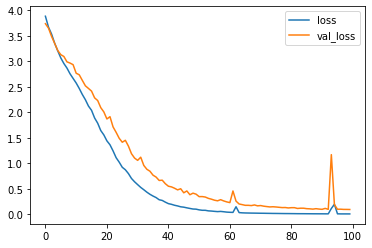

In [18]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

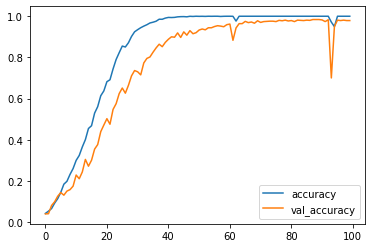

In [19]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [20]:
IDs=[]
Feature_vectors=[]
for key in all_classes:
    files = os.listdir("JPEGImages\\"+key)
    input_arr=[]

    for i in range(10):
        id= all_classes.index(key)
        IDs.append(id)
        image= tf.keras.preprocessing.image.load_img(path="JPEGImages\\"+key+"\\"+files[i],grayscale=False,color_mode="rgb",target_size=IMG_SIZE,interpolation='nearest')
        input=tf.keras.preprocessing.image.img_to_array(image)
        input_arr.append(input)
    if(len(input_arr)>0):
        input_model= np.array(input_arr)
        features= feature_extractor_model.predict(input_model)
        for vector in features:
            Feature_vectors.append(vector)  
    print(key)
    

1/1 [==============================] - 0s 267ms/step
antelope
1/1 [==============================] - 0s 25ms/step
bat
1/1 [==============================] - 0s 25ms/step
beaver
1/1 [==============================] - 0s 29ms/step
blue+whale
1/1 [==============================] - 0s 26ms/step
bobcat
1/1 [==============================] - 0s 27ms/step
buffalo
1/1 [==============================] - 0s 29ms/step
chihuahua
1/1 [==============================] - 0s 26ms/step
chimpanzee
1/1 [==============================] - 0s 29ms/step
collie
1/1 [==============================] - 0s 28ms/step
cow
1/1 [==============================] - 0s 26ms/step
dalmatian
1/1 [==============================] - 0s 28ms/step
deer
1/1 [==============================] - 0s 27ms/step
dolphin
1/1 [==============================] - 0s 28ms/step
elephant
1/1 [==============================] - 0s 28ms/step
fox
1/1 [==============================] - 0s 27ms/step
german+shepherd
1/1 [==============================] 

In [21]:
X= np.array(Feature_vectors)
print(X.shape)
y= classifier.predict(X)
print(y.shape)
count_correct=0
for i in range(y.shape[0]):
    predicted= np.argmax( y[i])
    truth= IDs[i]
    if(predicted==truth):
        count_correct+=1
    print(all_classes[truth]+"---"+all_classes[predicted])
print(count_correct)

(500, 2048)
16/16 [==============================] - 0s 1ms/step
(500, 50)
antelope---fox
antelope---dolphin
antelope---hippopotamus
antelope---wolf
antelope---hippopotamus
antelope---hippopotamus
antelope---mole
antelope---spider+monkey
antelope---hippopotamus
antelope---horse
bat---rat
bat---mole
bat---hippopotamus
bat---persian+cat
bat---dolphin
bat---dalmatian
bat---horse
bat---spider+monkey
bat---rat
bat---collie
beaver---hippopotamus
beaver---rat
beaver---otter
beaver---hippopotamus
beaver---humpback+whale
beaver---humpback+whale
beaver---persian+cat
beaver---rat
beaver---otter
beaver---hippopotamus
blue+whale---rat
blue+whale---hippopotamus
blue+whale---dolphin
blue+whale---rat
blue+whale---rat
blue+whale---rat
blue+whale---hippopotamus
blue+whale---rat
blue+whale---hippopotamus
blue+whale---otter
bobcat---hippopotamus
bobcat---hippopotamus
bobcat---hippopotamus
bobcat---hippopotamus
bobcat---dolphin
bobcat---hippopotamus
bobcat---hippopotamus
bobcat---hippopotamus
bobcat---hipp